In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function
import torch

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


# What is PyTorch

In [4]:
x = torch.empty(5, 3)
x

tensor([[-3.3193e+09,  4.5626e-41, -1.8469e-25],
        [ 3.0935e-41,         nan,  0.0000e+00],
        [ 7.6194e+31,  1.5564e+28,  4.7984e+30],
        [ 6.2121e+22,  1.8370e+25,  1.4603e-19],
        [ 1.6795e+08,  4.7423e+30,  4.7393e+30]])

In [5]:
torch.rand(5, 3)

tensor([[0.2402, 0.8470, 0.0645],
        [0.6652, 0.4473, 0.4040],
        [0.9924, 0.3513, 0.7971],
        [0.6077, 0.8099, 0.5854],
        [0.5537, 0.4995, 0.5559]])

In [6]:
torch.zeros(5, 3, dtype=torch.long)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [7]:
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [8]:
x = x.new_ones(5, 3, dtype=torch.double)
x

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [9]:
x = torch.randn_like(x, dtype=torch.float)
x

tensor([[ 0.8965, -0.2493,  0.3370],
        [ 1.1331, -0.9136,  0.9523],
        [ 0.4709,  1.5919, -0.2381],
        [-0.5139,  1.8815,  1.0621],
        [-0.2899,  1.4992,  1.0780]])

In [10]:
x.size()

torch.Size([5, 3])

In [11]:
y = torch.rand(5, 3)
x + y

tensor([[ 1.8484, -0.1927,  0.8655],
        [ 2.1087, -0.3571,  1.8366],
        [ 1.4299,  2.5458,  0.0442],
        [ 0.4535,  2.7954,  1.5473],
        [ 0.5305,  2.4905,  1.9223]])

In [12]:
torch.add(x, y)

tensor([[ 1.8484, -0.1927,  0.8655],
        [ 2.1087, -0.3571,  1.8366],
        [ 1.4299,  2.5458,  0.0442],
        [ 0.4535,  2.7954,  1.5473],
        [ 0.5305,  2.4905,  1.9223]])

In [13]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
result

tensor([[ 1.8484, -0.1927,  0.8655],
        [ 2.1087, -0.3571,  1.8366],
        [ 1.4299,  2.5458,  0.0442],
        [ 0.4535,  2.7954,  1.5473],
        [ 0.5305,  2.4905,  1.9223]])

In [14]:
y.add_(x)
y

tensor([[ 1.8484, -0.1927,  0.8655],
        [ 2.1087, -0.3571,  1.8366],
        [ 1.4299,  2.5458,  0.0442],
        [ 0.4535,  2.7954,  1.5473],
        [ 0.5305,  2.4905,  1.9223]])

In [15]:
x[:, 1]

tensor([-0.2493, -0.9136,  1.5919,  1.8815,  1.4992])

In [16]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [17]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.3015])
-1.3015447854995728


In [18]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [19]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [20]:
a.add_(1)
a, b

(tensor([2., 2., 2., 2., 2.]), array([2., 2., 2., 2., 2.], dtype=float32))

In [21]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 2, out=a)
a, b

(array([3., 3., 3., 3., 3.]),
 tensor([3., 3., 3., 3., 3.], dtype=torch.float64))

In [22]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([-0.3015], device='cuda:0')
tensor([-0.3015], dtype=torch.float64)


# AutoGrad

In [35]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [36]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [37]:
print(y.grad_fn)

In [41]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [42]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [43]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [44]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([  970.1736, -1001.2971,   674.5993], grad_fn=<MulBackward0>)


In [45]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [46]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


In [47]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


# Neural Networks

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule: weight = weight - learning_rate * gradient

In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        print(x.size())
        x = self.conv1(x)
        print(x.size())
        x = F.relu(x)
        print(x.size())
        x = F.max_pool2d(x, (2, 2))
        # If the size is a square you can only specify a single number
        print(x.size())
        x = self.conv2(x)
        print(x.size())
        x = F.relu(x)
        print(x.size())
        x = F.max_pool2d(x, 2)
        print(x.size())
        x = x.view(-1, self.num_flat_features(x))
        print(x.size())
        x = self.fc1(x)
        print(x.size())
        x = F.relu(x)
        print(x.size())
        x = self.fc2(x)
        print(x.size())
        x = F.relu(x)
        print(x.size())
        x = self.fc3(x)
        print(x.size())
        
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [75]:
params = list(net.parameters())
print(len(params))

for param in params:
    print(param.size())

10
torch.Size([6, 1, 3, 3])
torch.Size([6])
torch.Size([16, 6, 3, 3])
torch.Size([16])
torch.Size([120, 576])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([10, 84])
torch.Size([10])


In [76]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

torch.Size([1, 1, 32, 32])
torch.Size([1, 6, 30, 30])
torch.Size([1, 6, 30, 30])
torch.Size([1, 6, 15, 15])
torch.Size([1, 16, 13, 13])
torch.Size([1, 16, 13, 13])
torch.Size([1, 16, 6, 6])
torch.Size([1, 576])
torch.Size([1, 120])
torch.Size([1, 120])
torch.Size([1, 84])
torch.Size([1, 84])
torch.Size([1, 10])
tensor([[ 0.0344, -0.0391,  0.0616, -0.0139,  0.1388,  0.0714,  0.0477,  0.0927,
         -0.1153, -0.0992]], grad_fn=<AddmmBackward>)


In [80]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [81]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

torch.Size([1, 1, 32, 32])
torch.Size([1, 6, 30, 30])
torch.Size([1, 6, 30, 30])
torch.Size([1, 6, 15, 15])
torch.Size([1, 16, 13, 13])
torch.Size([1, 16, 13, 13])
torch.Size([1, 16, 6, 6])
torch.Size([1, 576])
torch.Size([1, 120])
torch.Size([1, 120])
torch.Size([1, 84])
torch.Size([1, 84])
torch.Size([1, 10])
tensor(1.0533, grad_fn=<MseLossBackward>)


In [84]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [85]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0105, -0.0011,  0.0056,  0.0089,  0.0226,  0.0218])


In [86]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [87]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

torch.Size([1, 1, 32, 32])
torch.Size([1, 6, 30, 30])
torch.Size([1, 6, 30, 30])
torch.Size([1, 6, 15, 15])
torch.Size([1, 16, 13, 13])
torch.Size([1, 16, 13, 13])
torch.Size([1, 16, 6, 6])
torch.Size([1, 576])
torch.Size([1, 120])
torch.Size([1, 120])
torch.Size([1, 84])
torch.Size([1, 84])
torch.Size([1, 10])


# Training a Classifier

In [89]:
import torch
import torchvision
import torchvision.transforms as transforms

In [91]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Using downloaded and verified file: ./data/cifar-10-python.tar.gz
Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


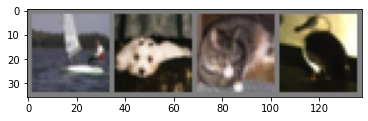

 ship   dog   cat  bird


In [92]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [93]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [94]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [95]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.199
[1,  4000] loss: 1.853
[1,  6000] loss: 1.678
[1,  8000] loss: 1.556
[1, 10000] loss: 1.515
[1, 12000] loss: 1.445
[2,  2000] loss: 1.363
[2,  4000] loss: 1.355
[2,  6000] loss: 1.326
[2,  8000] loss: 1.298
[2, 10000] loss: 1.277
[2, 12000] loss: 1.266
Finished Training


In [96]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

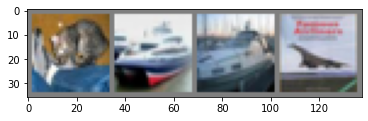

GroundTruth:    cat  ship  ship plane


In [97]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [98]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [99]:
outputs = net(images)

In [100]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car plane


In [101]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [102]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 38 %
Accuracy of   car : 61 %
Accuracy of  bird : 47 %
Accuracy of   cat : 39 %
Accuracy of  deer : 49 %
Accuracy of   dog : 38 %
Accuracy of  frog : 59 %
Accuracy of horse : 67 %
Accuracy of  ship : 88 %
Accuracy of truck : 53 %


In [103]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [104]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [105]:
inputs, labels = data[0].to(device), data[1].to(device)